# Comparison of Metabolic Reconstructions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from collections import Counter
from functools import reduce
from cobra.io import read_sbml_model, load_json_model, load_matlab_model
from google_sheet import GoogleSheet

## 1. Conf. Score Distribution

In [2]:
##### ----- Generate datasets from Google Sheet ----- #####
#Credential file
KEY_FILE_PATH = 'credentials.json'
#CHO Network Reconstruction + Recon3D_v3 Google Sheet ID
SPREADSHEET_ID = '1MlBXeHIKw8k8fZyXm-sN__AHTRSunJxar_-bqvukZws'
# Initialize the GoogleSheet object
sheet = GoogleSheet(SPREADSHEET_ID, KEY_FILE_PATH)
# Read data from the Google Sheet
sheet_rxns = 'Rxns'
rxns = sheet.read_google_sheet(sheet_rxns)

RefreshError: ('invalid_grant: Invalid JWT Signature.', {'error': 'invalid_grant', 'error_description': 'Invalid JWT Signature.'})

In [ ]:
#### --- Conf. Score distribution throughout the dataset --- ####
data_numeric = pd.to_numeric(rxns['Conf. Score'], errors='coerce')
data_numeric = data_numeric.dropna()

# Plotting the histogram
plt.figure(figsize=(10, 4))
plt.hist(data_numeric, bins='auto', color='steelblue', edgecolor='black')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xticks(data_numeric.unique())
plt.xlabel('Values', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Confidence Score Distribution', fontsize=14, fontweight='bold')

plt.savefig('../Analyses/conf_score_distribution.png', dpi=300)
plt.show()

## 2. Subsystems

In [4]:
# Generate models for comparison
# icho1766 = read_sbml_model('../Data/reconciliation/models/iCHOv1_final.xml')
# icho2291 = read_sbml_model('../Data/Reconciliation/models/iCHO2291.xml')
# icho2101 = load_json_model('../Data/Reconciliation/models/iCHO2101.json')
iCHO3K = load_json_model('iCHO3K.json')

In [5]:
#### --- Calculate the amount of reactions per Subsystem ---- ####

#iCHO 1766
subs = []
for reaction in icho1766.reactions:
    subs.append(reaction.subsystem.upper())
    
icho1766_subs = Counter(subs)

#iCHO 2291
subs = []
for reaction in icho2291.reactions:
    subs.append(reaction.subsystem.upper())
    
icho2291_subs = Counter(subs)

# iCHO 2101
subs = []
for reaction in icho2101.reactions:
    subs.append(reaction.subsystem.upper())
    
icho2101_subs = Counter(subs)

#iCHO 3K
subs = []
for reaction in iCHO3K.reactions:
    subs.append(reaction.subsystem.upper())
    
iCHO3K_subs = Counter(subs)

In [6]:
# Mapping of subsystems to categories (systems)

# Updated Mapping of subsystems to categories
category_mapping = {
    'Amino Acid Metabolism': [
        'AMINO ACID METABOLISM',
        'ALANINE AND ASPARTATE METABOLISM',
        'AMINO ACID DERIVATIVE',
        'ARGININE AND PROLINE METABOLISM',
        'BETA-ALANINE METABOLISM',
        'CYSTEINE METABOLISM',
        'D-ALANINE METABOLISM',
        'GLUTAMATE METABOLISM',
        'GLUTATHIONE METABOLISM',
        'GLYCINE, SERINE, ALANINE AND THREONINE METABOLISM',
        'GLYCINE, SERINE, AND THREONINE METABOLISM',
        'HISTIDINE METABOLISM',
        'LYSINE METABOLISM',
        'METHIONINE AND CYSTEINE METABOLISM',
        'METHIONINE METABOLISM',
        'PEPTIDE METABOLISM',
        'PHENYLALANINE METABOLISM',
        'SELENOAMINO ACID METABOLISM',
        'SPERMINE DEGRADATION',  # Added
        'TAURINE AND HYPOTAURINE METABOLISM',
        'TRYPTOPHAN METABOLISM',
        'TYROSINE METABOLISM',
        'UREA CYCLE',
        'UREA CYCLE/AMINO GROUP METABOLISM',
        'VALINE, LEUCINE, AND ISOLEUCINE METABOLISM'
    ],
    'Carbohydrates Metabolism': [
        'ALKALOID SYNTHESIS',
        'AMINOSUGAR METABOLISM',
        'ASCORBATE AND ALDARATE METABOLISM',
        'BUTANOATE METABOLISM',
        'C5-BRANCHED DIBASIC ACID METABOLISM',
        'FRUCTOSE AND MANNOSE METABOLISM',
        'GALACTOSE METABOLISM',
        'GLYOXYLATE AND DICARBOXYLATE METABOLISM',
        'HEPARAN SULFATE DEGRADATION',
        'HYALURONAN METABOLISM',
        'LIMONENE AND PINENE DEGRADATION',
        'LIPOATE METABOLISM',
        'PENTOSE AND GLUCURONATE INTERCONVERSIONS',
        'PROPANOATE METABOLISM',
        'PYRUVATE METABOLISM',
        'STARCH AND SUCROSE METABOLISM',
        'STILBENE, COUMARINE AND LIGNIN SYNTHESIS',
        'OTHER CARBON METABOLISM'
    ],
    'Energy Metabolism': [
        'BIOMASS',
        'BIOMASS SYNTHESIS',
        'CITRIC ACID CYCLE',
        'GLYCOLYSIS/GLUCONEOGENESIS',
        'OXIDATIVE PHOSPHORYLATION',
        'PENTOSE PHOSPHATE PATHWAY',
        'ROS DETOXIFICATION',
        'CENTRAL CARBON AND ENERGY METABOLISM'
    ],
    'Exchange/Transport': [
        'EXCHANGE/DEMAND/SINK',
        'EXCHANGE/DEMAND REACTION',
        'EXCHANGE/DEMAND/SINK REACTION',
        'EXCHANGE',
        'DEMAND',
        'SINK',
        'TRANSPORT, ENDOPLASMIC RETICULAR',
        'TRANSPORT, EXTRACELLULAR',
        'TRANSPORT, GOLGI APPARATUS',
        'TRANSPORT, LYSOSOMAL',
        'TRANSPORT, MITOCHONDRIAL',
        'TRANSPORT, NUCLEAR',
        'TRANSPORT, PEROXISOMAL',
        'TRANSPORT'
    ],
    'Lipid Metabolism': [
        'ARACHIDONIC ACID METABOLISM',
        'BILE, EICOSANOID AND STEROID METABOLISM',
        'BILE ACID SYNTHESIS',
        'CARNITINE SHUTTLE',
        'CHOLESTEROL METABOLISM',
        'EICOSANOID METABOLISM',
        'FATTY ACID METABOLISM',
        'FATTY ACID OXIDATION',
        'FATTY ACID SYNTHESIS',
        'FATTY ACID ELONGATION',
        'GLYCAN AND GLYCOSAMINOGLYCAN METABOLISM',
        'GLYCEROLIPID METABOLISM',
        'GLYCEROPHOSPHOLIPID METABOLISM',
        'GLYCOSPHINGOLIPID METABOLISM',
        'GLYCOSYLPHOSPHATIDYLINOSITOL-ANCHOR BIOSYNTHESIS',
        'GLYCOSYLPHOSPHATIDYLINOSITOL (GPI)-ANCHOR BIOSYNTHESIS',
        'GLYCEROPHOSPHOLIPID, SPHINGOLIPID AND INOSITOL METABOLISM'
        'INOSITOL PHOSPHATE METABOLISM',
        'LINOLEATE METABOLISM',
        'PHOSPHATIDYLINOSITOL PHOSPHATE METABOLISM',
        'R GROUP SYNTHESIS',
        'SPHINGOLIPID METABOLISM',
        'SQUALENE AND CHOLESTEROL SYNTHESIS',
        'TRIACYLGLYCEROL SYNTHESIS'
    ],
    'Nucleotide Metabolism': [
        'NUCLEOTIDE SALVAGE PATHWAY',
        'NUCLEOTIDE INTERCONVERSION',
        'NUCLEOTIDES',
        'PURINE METABOLISM',
        'PURINE CATABOLISM',
        'PURINE SYNTHESIS',
        'PYRIMIDINE METABOLISM',
        'PYRIMIDINE BIOSYNTHESIS',
        'PYRIMIDINE CATABOLISM',
        'PYRIMIDINE SYNTHESIS',
        'NUCLEOTIDE SUGAR METABOLISM',
        'NUCLEOTIDE METABOLISM',
        'NUCELOTIDE METABOLISM',
        'SALVAGE PATHWAY'
    ],
    'Protein Product Synthesis': [
        'BLOOD GROUP SYNTHESIS',
        'CHONDROITIN SULFATE DEGRADATION',
        'CHONDROITIN SYNTHESIS',
        'KERATAN SULFATE METABOLISM',
        'KERATAN SULFATE SYNTHESIS',
        'N-GLYCAN METABOLISM',
        'N-GLYCAN BIOSYNTHESIS',
        'N-GLYCAN SYNTHESIS',  # Added
        'N-GLYCAN DEGRADATION',
        'O-GLYCAN SYNTHESIS',
        'PROTEIN ASSEMBLY',
        'PROTEIN DEGRADATION',
        'PROTEIN MODIFICATION',
        'PROTEIN PRODUCTION',
        'GLYCAN AND GLYCOSAMINOGLYCAN METABOLISM'
    ],
    'Unassigned': [
        'UNASSIGNED',
        'MISCELLANEOUS'
    ],
    'Vitamin & Cofactor Metabolism': [
        'ANDROGEN AND ESTROGEN SYNTHESIS AND METABOLISM',
        'BIOTIN METABOLISM',
        'COA METABOLISM',
        'COA SYNTHESIS',
        'COA CATABOLISM',
        'CYTOCHROME METABOLISM',
        'FOLATE METABOLISM',
        'NAD METABOLISM',
        'PORPHYRIN METABOLISM',
        'TETRAHYDROBIOPTERIN METABOLISM',
        'THIAMINE METABOLISM',
        'UBIQUINONE AND OTHER TERPENOID-QUINONE SYNTHESIS',
        'UBIQUINONE SYNTHESIS',
        'VITAMIN A METABOLISM',
        'VITAMIN B2 METABOLISM',
        'VITAMIN B6 METABOLISM',
        'VITAMIN B12 METABOLISM',
        'VITAMIN C METABOLISM',
        'VITAMIN D METABOLISM',
        'VITAMIN D',  # Adjusted to include both variants
        'VITAMIN E METABOLISM',
        'XENOBIOTICS METABOLISM',
        'HEME SYNTHESIS',
        'HEME DEGRADATION',
        'CYP METABOLISM',
        'VITAMIN AND COFACTOR METABOLISM'
    ]
}

In [7]:
def allocate_counts(counts_dict, category_mapping):
    from collections import defaultdict
    # Create reverse mapping
    subsystem_to_category = {}
    for category, subsystems in category_mapping.items():
        for subsystem in subsystems:
            subsystem_to_category[subsystem.upper()] = category
    
    # Initialize category counts
    category_counts = defaultdict(int)
    
    # Allocate counts
    for subsystem, count in counts_dict.items():
        subsystem_upper = subsystem.upper()
        if subsystem_upper in subsystem_to_category:
            category = subsystem_to_category[subsystem_upper]
            category_counts[category] += count
        else:
            category_counts['Other'] += count
    
    return category_counts

In [8]:
# Allocate counts for each dictionary
icho1766_systems = allocate_counts(icho1766_subs, category_mapping)
icho2101_systems = allocate_counts(icho2101_subs, category_mapping)
icho2291_systems = allocate_counts(icho2291_subs, category_mapping)
iCHO3K_systems = allocate_counts(iCHO3K_subs, category_mapping)

In [9]:
# Create a list of datasets
datasets = {
    'iCHO1766': icho1766_systems,
    'iCHO2101': icho2101_systems,
    'iCHO2291': icho2291_systems,
    'iCHO3K': iCHO3K_systems
}

# Get the list of all categories
all_categories = set()
for counts in datasets.values():
    all_categories.update(counts.keys())

all_categories = sorted(all_categories)

# Initialize DataFrame
df = pd.DataFrame(index=all_categories)

# Populate DataFrame
for dataset_name, counts in datasets.items():
    df[dataset_name] = [counts.get(category, 0) for category in all_categories]

# Replace NaN with 0 (in case there are any)
df = df.fillna(0)

# Compute total reactions per dataset
total_reactions = df.sum(axis=0)

# Add 'Total Reactions' as a new row to 'df'
df.loc['Total Reactions'] = total_reactions

In [10]:
df

,iCHO1766,iCHO2101,iCHO2291,iCHO3K
Amino Acid Metabolism,551,576,381,703
Carbohydrates Metabolism,229,241,158,285
Energy Metabolism,112,117,140,150
Exchange/Transport,3026,3677,2894,3789
Lipid Metabolism,1239,1275,940,3113
Nucleotide Metabolism,304,312,288,334
Other,193,196,289,1141
Protein Product Synthesis,375,379,497,551
Unassigned,209,222,387,326
Vitamin & Cofactor Metabolism,425,441,262,612


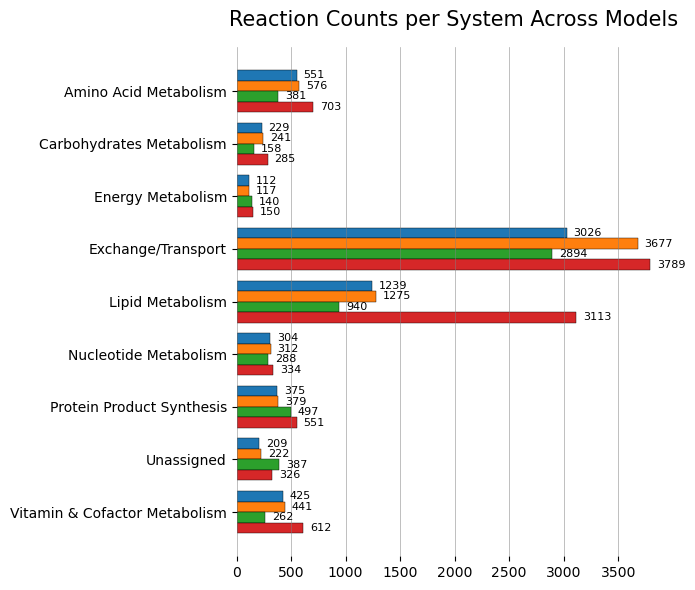

In [11]:
# Exclude 'Total Reactions' for plotting
df_plot = df.drop(['Total Reactions', 'Other'], axis=0)

# Extract categories and datasets
categories = df_plot.index.tolist()
datasets = df_plot.columns.tolist()
n_categories = len(categories)
n_datasets = len(datasets)

# Define bar heights and positions
bar_height = 0.8 / n_datasets  # Adjust the bar height based on the number of datasets
y_positions = np.arange(n_categories)

# Set a professional color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colors from your style
model_names = datasets  # Assuming datasets are in the same order as colors

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))

for i, (dataset, color) in enumerate(zip(datasets, colors)):
    counts = df_plot[dataset].values
    # Calculate positions for each dataset's bars
    positions = y_positions - 0.4 + i * bar_height + bar_height / 2
    bars = ax.barh(positions, counts, height=bar_height, label=dataset, color=color,
                   edgecolor='black', linewidth=0.3)

    # Annotate bars with their values
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{int(width)}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(5, 0),
                    textcoords='offset points',
                    ha='left', va='center',
                    fontweight='light', fontsize=8)

# Customize the plot
ax.set_yticks(y_positions)
ax.set_yticklabels(categories, fontsize=10)
ax.set_title('Reaction Counts per System Across Models',
             fontsize=15, fontweight='light', pad=15)

# Invert the y-axis to reverse the order of the bars
ax.invert_yaxis()

# Add grid lines
ax.grid(True, linestyle='-', linewidth=0.5, axis='x', color='gray', alpha=0.7)

# Remove spines for a cleaner look
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust x-axis ticks
ax.tick_params(axis='x', labelsize=10)

# Create custom handles for the legend
custom_handles = [mpatches.Patch(color=color, label=model_name)
                  for color, model_name in zip(colors, model_names)]


# Adjust layout
plt.tight_layout()

# Save the plot (adjust the path as needed)
plt.savefig('../Analyses/recons_comparisons/metabolic_models_comparison_horizontal_inverted.svg', format='svg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## 3. Reactions, Genes and Metabolites

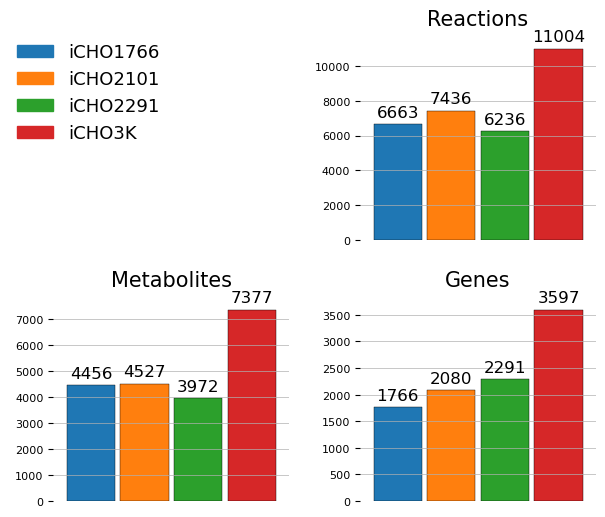

In [12]:
#Reaction counts for each recon
icho1766_rxns = len(icho1766.reactions)
icho2291_rxns = len(icho2291.reactions)
icho2101_rxns = len(icho2101.reactions)
icho3K_rxns = len(iCHO3K.reactions)

#Metabolite counts for each recon
icho1766_mets = len(icho1766.metabolites)
icho2291_mets = len(icho2291.metabolites)
icho2101_mets = len(icho2101.metabolites)
icho3K_mets = len(iCHO3K.metabolites)

# Gene counts for each recon
icho1766_gens = len(icho1766.genes)
icho2291_gens = len(icho2291.genes)
icho2101_gens = len(icho2101.genes)
icho3K_gens = len(iCHO3K.genes)


# Creating a DataFrame from the counts
data = {
    'iCHO1766': [icho1766_rxns, icho1766_mets, icho1766_gens],
    'iCHO2101': [icho2101_rxns, icho2101_mets, icho2101_gens],
    'iCHO2291': [icho2291_rxns, icho2291_mets, icho2291_gens],
    'iCHO3K': [icho3K_rxns, icho3K_mets, icho3K_gens]
}

counts_df = pd.DataFrame(data, index=['Reactions', 'Metabolites', 'Genes'])

# Improved aesthetics for a research publication plot
def create_research_plot(counts_df):
    # Set a professional color palette
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    model_names = ['iCHO1766', 'iCHO2101', 'iCHO2291', 'iCHO3K']

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))
    
    # Turn off the first subplot
    ax1, ax2, ax3, ax4 = axes.flatten()
    ax1.axis('off')
    
    # Define the axes for the categories
    axes_mapping = {0: ax2, 1: ax3, 2: ax4}
    categories = ['Reactions', 'Metabolites', 'Genes']

    # A function to annotate the bars with their values
    def annotate_bars(ax):
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', xytext=(0, 3), textcoords='offset points', fontweight='light', fontsize=12)

    # Plotting and annotating each category
    for index, category in enumerate(categories):
        ax = axes_mapping[index]
        counts_df.loc[category].plot(kind='bar', ax=ax, title=category, color=colors, edgecolor='black', linewidth=.3, width=0.9, legend=False)
        annotate_bars(ax)
        ax.set_title(category, fontsize=15, fontweight='light', pad=10)
        ax.grid(True, linestyle='-', linewidth=0.5, axis='y')
        ax.set_xticks([]) # Remove x-axis ticks
        ax.set_xticklabels([])  # Remove x-axis labels
        ax.tick_params(axis='y', labelsize=8)

    # Remove border of the plots
    for ax in [ax2, ax3, ax4]:
        for spine in ax.spines.values():
            spine.set_visible(False)

    # Create custom handles for the legend
    custom_handles = [mpatches.Patch(color=color, label=model_name) for color, model_name in zip(colors, model_names)]
    fig.legend(handles=custom_handles, loc='upper left',bbox_to_anchor=(0.05, 0.9), fontsize=13, frameon=False, fancybox=False, shadow=False)
    
    # Adjust spacing between the subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    plt.savefig('../Analyses/recons_comparisons/metabolic_models_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
create_research_plot(counts_df)

In [13]:
import re
list2 = [m.id[:-2] for m in icho1766.metabolites]
set2 = set(list2)
print(len(list2))
print(len(set2))
print('----------------------------------------')
list3 = [m.id[:-2] for m in icho2101.metabolites]
set3 = set(list3)
print(len(list3))
print(len(set3))
print('----------------------------------------')
list4 = [m.id[:-2] for m in icho2291.metabolites]
set4 = set(list4)
print(len(list4))
print(len(set4))
print('----------------------------------------')
list5 = [m.id[:-2] for m in iCHO3K.metabolites]
set5 = set(list5)
print(len(list5))
print(len(set5))

4456
2342
----------------------------------------
4527
2406
----------------------------------------
3972
2078
----------------------------------------
7377
3696


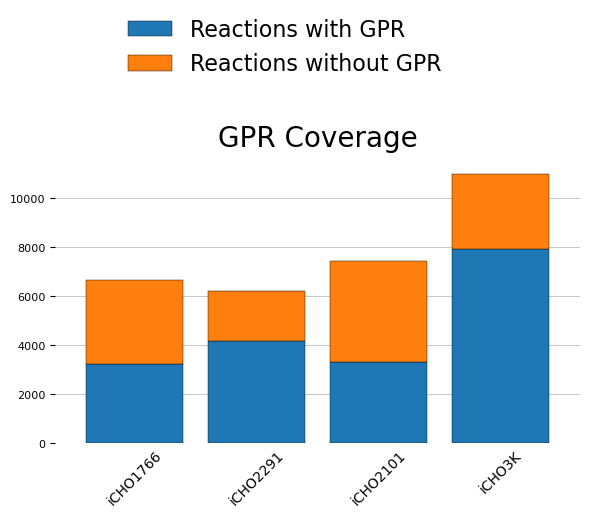

In [14]:
# Initialize a dictionary to store the counts
counts = {
    'Model': [],
    'Reactions with GPR': [],
    'Reactions without GPR': [],
    'Total Reactions': []
}

# Loop through the models and calculate counts
models = [icho1766, icho2291, icho2101, iCHO3K]#, recon3d]
model_names = ['iCHO1766', 'iCHO2291', 'iCHO2101', 'iCHO3K']#, 'Recon3D']

for model, name in zip(models, model_names):
    rxn_with_gpr = sum(1 for rxn in model.reactions if str(rxn.gpr) not in ['', 'nan'])
    rxn_without_gpr = sum(1 for rxn in model.reactions if str(rxn.gpr) in ['', 'nan'])
    total = len(model.reactions)

    counts['Model'].append(name)
    counts['Reactions with GPR'].append(rxn_with_gpr)
    counts['Reactions without GPR'].append(rxn_without_gpr)
    counts['Total Reactions'].append(total)

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame(counts)
counts_df['%'] = (counts_df['Reactions with GPR']/counts_df['Total Reactions'])*100

# Setting the index to the model names
counts_df.set_index('Model', inplace=True)

def plot_gpr_coverage(counts_df):
    # Create a plot with the right size and stacked bars directly
    ax = counts_df[['Reactions with GPR', 'Reactions without GPR']].plot(
        kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=.3, width=0.8, legend=False, figsize=(6, 6))
    plt.title('GPR Coverage', fontsize=20, pad=10)


    # Label configuration
    ax.tick_params(axis='x', rotation=0)  # Set rotation for x ticks if needed
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate labels if needed
    ax.set_xlabel('')

    # Grid and axis adjustments
    ax.grid(True, linestyle='-', linewidth=0.5, axis='y')
    ax.set_axisbelow(True)  # Ensure grid is behind the bars

    # Hide x-axis ticks
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', labelsize=8)

    # Remove plot frame borders
    for spine in ax.spines.values():
        spine.set_visible(False)
        
    # Legend configuration
    ax.legend(loc='center left',bbox_to_anchor=(0.1, 1.4), fontsize=16, frameon=False, fancybox=False, shadow=False)


    # Optimize layout
    plt.tight_layout()

    # Save the figure
    plt.savefig('../Analyses/recons_comparisons/gpr_coverage.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


# Call the function with the DataFrame
plot_gpr_coverage(counts_df)

In [15]:
counts_df

,Reactions with GPR,Reactions without GPR,Total Reactions,%
Model,,,,
iCHO1766,3229,3434,6663,48.461654
iCHO2291,4182,2054,6236,67.062219
iCHO2101,3339,4097,7436,44.903174
iCHO3K,7920,3084,11004,71.973828


## 4. Gene Essentiality

In [16]:
import pickle
import pandas as pd
from scipy.io import loadmat
from time import process_time
import cobra
from cobra.io import load_json_model, read_sbml_model, load_matlab_model
from cobra.flux_analysis.variability import find_essential_genes, find_essential_reactions

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

In [17]:
# Load Models

iCHO3K = load_json_model('iCHO3K.json')
iCHO1766 = read_sbml_model('../Data/Reconciliation/models/iCHOv1_final.xml')
iCHO2291 = read_sbml_model('../Data/Reconciliation/models/iCHO2291.xml')
iCHO2101 = load_json_model('../Data/Reconciliation/models/iCHO2101.json')
WT_P4_Bio141 = load_matlab_model('../Data/Context_specific_models/AUG15_reduced_model_CF_WT_P4_Bio141.mat')
WT_P4_Bio142 = load_matlab_model('../Data/Context_specific_models/AUG25_reduced_model_CF_WT_P4_Bio142.mat')
WT_P4_Bio143 = load_matlab_model('../Data/Context_specific_models/AUG15_reduced_model_CF_WT_P4_Bio143.mat')

In [18]:
# Load the dataset for the experimentally validated essential genes

exp_essential_genes = pd.read_csv('../Data/Gene_Essentiality/cho_essential_genes.csv', sep='\t')
exp_essential_genes['gene'] = exp_essential_genes['gene'].str.replace('__1$', '', regex=True)
# Extract all gene names
all_gene_names = set()
for names in exp_essential_genes['gene']:
    for name in names.split('|'): #Extract the names of the genes with two aliases
        all_gene_names.add(name)

In [19]:
''' In case of retrieving the gene ID please activate this code
# Generation gene ID of exp_essential_genes with biopython
from Bio import Entrez
import pandas as pd

# Set your email (this is required by NCBI for accessing their services)
Entrez.email = "dh.choi@orcid"

# Your dataset with gene symbols (replace with actual dataframe)
gene_symbols = exp_essential_genes.gene  # Example gene symbols

# Function to fetch gene ID using Entrez API
def get_gene_id(gene_symbol):
    search_handle = Entrez.esearch(db="gene", term=f"{gene_symbol}[Gene] AND Cricetulus griseus[Organism]")
    record = Entrez.read(search_handle)
    search_handle.close()
    if record["IdList"]:
        return record["IdList"][0]  # Return the first gene ID found
    else:
        return None

# Create a DataFrame to store gene symbols and their corresponding gene IDs
df = pd.DataFrame({'gene': gene_symbols})
df['entrez_gene_id'] = df['gene'].apply(get_gene_id)

# Display the result
print(df)

# Save the DataFrame to a pickle file
with open("gene_id_mapping.pkl", "wb") as f:
    pickle.dump(df, f)

# Save the result to a CSV file as well, if needed
df.to_csv("gene_id_mapping.csv", index=False)

'''

' In case of retrieving the gene ID please activate this code\n# Generation gene ID of exp_essential_genes with biopython\nfrom Bio import Entrez\nimport pandas as pd\n\n# Set your email (this is required by NCBI for accessing their services)\nEntrez.email = "dh.choi@orcid"\n\n# Your dataset with gene symbols (replace with actual dataframe)\ngene_symbols = exp_essential_genes.gene  # Example gene symbols\n\n# Function to fetch gene ID using Entrez API\ndef get_gene_id(gene_symbol):\n    search_handle = Entrez.esearch(db="gene", term=f"{gene_symbol}[Gene] AND Cricetulus griseus[Organism]")\n    record = Entrez.read(search_handle)\n    search_handle.close()\n    if record["IdList"]:\n        return record["IdList"][0]  # Return the first gene ID found\n    else:\n        return None\n\n# Create a DataFrame to store gene symbols and their corresponding gene IDs\ndf = pd.DataFrame({\'gene\': gene_symbols})\ndf[\'entrez_gene_id\'] = df[\'gene\'].apply(get_gene_id)\n\n# Display the result\np

In [20]:
# Load the DataFrame from the pickle file
with open("gene_id_mapping.pkl", "rb") as f:
    df_loaded = pickle.load(f)

# Display the loaded DataFrame
print(df_loaded)

          gene entrez_gene_id
0          Ubc      100689267
1       Ncaph2      100756862
2        Huwe1      100757403
3      Isg20l2      100752909
4        Coq8b      100770066
...        ...            ...
1975     Sprtn      100764217
1976     Perm1      100773289
1977   Tmem147      100751744
1978    Rnf216      100758416
1979  Rnaseh2b      100751948

[1980 rows x 2 columns]


In [21]:
# Load uptake and secretion rate "Intervals dict

with open('../Data/Uptake_Secretion_Rates/uptake_secretion_intrvl_wt_dict.pkl', 'rb') as file:
    uptsec_intrvl_wt = pickle.load(file)

with open('../Data/Uptake_Secretion_Rates/uptake_secretion_raw_wt_dict.pkl', 'rb') as file:
    uptsec_wt = pickle.load(file)

In [22]:
def constraint_model_feg(model, time, exp_dict, objective=None, solver=None, make_GM=None):
    """
    Constrain the model with experimental data and calculate the objective function value using pFBA.
    
    Parameters:
    - model: COBRA model to be constrained.
    - time: Time interval for applying the experimental constraints. Default is 'P2 to P4'.
    - objective: The objective reaction. Default is 'biomass_cho_s'.
    - solver: Solver to be used. Default is 'gurobi'.
    
    Returns:
    - pfba_obj: The optimized objective function value (growth rate or other objective).
    - pfba_solution: The full pFBA solution (flux distribution).
    """
    
    GM = model.copy()  # Copy the model to avoid modifying the original
    temp_dict = exp_dict
    
    # Default values if no argument is provided
    if objective is None:
        objective = 'biomass_cho_s'
    if solver is None:
        solver = 'gurobi'

    # Set the solver and the objective reaction
    GM.solver = solver
    GM.objective = objective

    # Constraint the model with experimental data
    #if objective is None:
    #    GM.reactions.biomass_cho_s.bounds = temp_dict['exp_growth_rate'][time]
    
    for rxn in GM.boundary:
        # Models that are forced to secrete ethanol are not feasible
        if rxn.id == 'EX_etoh_e':
            rxn.bounds = (-0.1,0.1)
            continue

        # Replace the lower and upper bound with experimental data
        if rxn.id in temp_dict.keys():
            rxn.bounds = temp_dict[rxn.id][time]
            continue

        # Keep boundaries open for essential metabolites
        if rxn.id == 'EX_h2o_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_h_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_o2_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_hco3_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_so4_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_pi_e':
            rxn.bounds = (-1000,1000)
            continue

        # Boundaries from Sink reactions on iCHO_v1
        if rxn.id == 'SK_Asn_X_Ser_Thr_r':
            rxn.bounds = (-0.001,1000)
            continue
        if rxn.id == 'SK_Tyr_ggn_c':
            rxn.bounds = (-0.001,1000)
            continue
        if rxn.id == 'SK_Ser_Thr_g':
            rxn.bounds = (-0.001,1000)
            continue
        if rxn.id == 'SK_pre_prot_r':
            rxn.bounds = (-0.001,1000)
            continue

        # Close uptake rates for the rest of the boundaries
        if rxn.id.startswith("EX_"):
            rxn.bounds = (0,1000) 
        if rxn.id.startswith("SK_"):
            rxn.bounds = (-0.00001,1000)
        if rxn.id.startswith("DM_"):
            rxn.bounds = (0,1000)
    model_exp_constrained = GM 
    
    if make_GM == True:
        for rxn in GM.boundary:
            if rxn.id in temp_dict.keys():
                rxn.bounds = (-1000,1000)
                print(rxn.bounds)
                print(rxn)
                continue
        pfba_solution_GM = cobra.flux_analysis.pfba(GM)
        pfba_obj_GM = pfba_solution_GM.fluxes[objective] 
        print(f"Optimized objective w/ opened bounds (growth rate): {pfba_obj_GM}")
    else: 
        pfba_obj_GM =[]
        GM = []
            
            
    # Perform pFBA (parsimonious FBA) to minimize the total flux
    pfba_solution = cobra.flux_analysis.pfba(model_exp_constrained)
    pfba_obj = pfba_solution.fluxes[objective]

    # Print and return the objective value and the full pFBA solution
    print(f"Optimized objective w/ exp constraints (growth rate): {pfba_obj}")
    
    # Return the objective value and the full pFBA solution
    return model_exp_constrained, pfba_obj, pfba_solution, pfba_obj_GM, GM

In [23]:
def constraint_model_feg_v2(model, exp_dict, exp_cond, exp_time, objective='biomass_cho_s', solver='gurobi'):
    """
    Constrain the model with experimental data and calculate the objective function value using pFBA.
    
    Parameters:
    - model: COBRA model to be constrained.
    - exp_dict: Dictionary containing experimental constraints for reactions.
        - objective: The objective reaction. Default is 'biomass_cho_s'.
    - exp_cond: Experimental condition identifier.
    - exp_time: Experimental time point.
    - solver: Solver to be used. Default is 'gurobi'.
    
    Returns:
    - model_exp_constrained: The constrained COBRA model.
    - pfba_obj: The optimized objective function value (growth rate or other objective).
    - pfba_solution: The full pFBA solution (flux distribution).
    """
    # Copy the model to avoid modifying the original
    GM = model.copy()
    temp_dict = exp_dict

    # Set the solver and the objective reaction
    GM.solver = solver
    GM.objective = objective

    
    # Open the bounds for the biomass reaction
    GM.reactions.get_by_id(objective).bounds = (0, 1000)
    
    for rxn in GM.boundary:
        # Keep boundaries open for essential metabolites
        if rxn.id in ['EX_h2o_e', 'EX_h_e', 'EX_o2_e', 'EX_hco3_e', 'EX_so4_e', 'EX_pi_e']:
            rxn.bounds = (-1000, 1000)
        elif rxn.id in ['SK_Asn_X_Ser_Thr_r', 'SK_Tyr_ggn_c', 'SK_Ser_Thr_g', 'SK_pre_prot_r']:
            rxn.bounds = (-0.001, 1000)
        elif rxn.id.startswith(("EX_", "SK_", "DM_")):
            rxn.bounds = (0, 1000)  # Close uptake rates for others

    print(f'Calculating Growth Rate...')
    exp_gr = exp_dict['exp_growth_rate'][(exp_cond, exp_time)]
    print(f'Experimental growth rate is: {exp_gr}')
    
    for reaction in GM.reactions:
        if reaction.id == 'EX_etoh_e':  # Model creates infeasible solutions when secreting ethanol
            continue
        for r, v in exp_dict.items():
            if reaction.id == r:
                reaction.upper_bound = 1000
                reaction.lower_bound = v[(exp_cond, exp_time)]

    pfba_solution = cobra.flux_analysis.pfba(GM)
    pfba_obj = pfba_solution.fluxes[objective]
    print(f'Simulated growth rate is: {pfba_obj}')

    return GM, pfba_obj, pfba_solution

In [24]:
## Pablo's modifification


def find_and_match_essential_genes(model, df_exp_essential, save_csv=True, print_df=False, model_GM = None):
    """
    This function finds and matches essential genes in the model with experimental Entrez gene data.
    It returns the number of total matched genes (len_mat) and the number of essential matched genes (len_mat_ess).
    """

    # Check if the necessary columns 'entrez_gene_id' and 'gene' exist in the dataframe
    required_columns = ['entrez_gene_id', 'gene']
    for col in required_columns:
        if col not in df_exp_essential.columns:
            raise KeyError(f"Column '{col}' is missing from the dataframe.")

    # Create a reverse lookup dictionary where the key is the Entrez Gene ID and the value is the gene symbol
    entrez_dict = df_exp_essential.set_index('entrez_gene_id')['gene'].to_dict()

    # Matching metabolic genes
    tmp_gene = []    
    for gene in model.genes:
        # Check if the gene.id matches any Entrez Gene ID in the reverse dictionary
        if gene.id in entrez_dict:
            entrez_gene_symbol = entrez_dict[gene.id]
            tmp_gene.append((gene.id, gene.name, entrez_gene_symbol))
    
    # Number of total matched genes
    len_mat = len(tmp_gene)

    # Find the essential reactions for the given model
    threshold = model.slim_optimize(error_value=None) * 0.9
    essential_reactions = find_essential_reactions(model, threshold=threshold)

    # Remove tRNA biosynthesis reactions (specifically from iCHO2291
    essential_reactions = [r for r in essential_reactions if not (r.subsystem == 'Biomass synthesis' and r.id.endswith('TRS'))]


    # Extract genes from the essential reactions list
    essential_genes = set([g for r in essential_reactions for g in r.genes])
        
    # Create a list to store the matched essential genes
    matched_genes = []

    # Iterate over the essential genes and check if they match with the Entrez Gene IDs
    for gene in essential_genes:
        gene_exp_ess = model.genes.get_by_id(gene.id)  # Get the gene from the model

        if gene_exp_ess.id in entrez_dict:
            entrez_gene_symbol = entrez_dict[gene_exp_ess.id]
            matched_genes.append((gene_exp_ess.id, gene_exp_ess.name, entrez_gene_symbol))

    # Convert the matched essential genes into a DataFrame
    matched_genes_essential_df = pd.DataFrame(matched_genes, columns=['gene_exp_ess.id', 'gene_exp_ess.name', 'entrez_gene_symbol'])

    # Save the result to a CSV file if save_csv is True
    if save_csv:
        matched_genes_essential_df.to_csv("'../Data/Gene_Essentiality/matched_gene_entrez_ids_feg.csv", index=False)

    # Print the DataFrame if print_df is True
    if print_df:
        print(matched_genes_essential_df)

    # Number of essential matched genes
    len_mat_ess = len(matched_genes_essential_df)
    
    if model_GM is None:
        # Print the summary information
        print(f"Total matched metabolic genes: {len_mat}")
        print(f"Matched essential genes: {len_mat_ess}/{len_mat}")
        print(f"Total simulated essential genes: {len(essential_genes)}")
        len_mat_GM_ess = []
    else: 
        
        essential_genes = find_essential_genes(model_GM)

        # Create a list to store the matched essential genes
        matched_genes_GM = []

        # Iterate over the essential genes and check if they match with the Entrez Gene IDs
        for gene in essential_genes:
            gene_exp_ess_GM = model_GM.genes.get_by_id(gene.id)  # Get the gene from the model

            if gene_exp_ess_GM.id in entrez_dict:
                entrez_gene_symbol = entrez_dict[gene_exp_ess_GM.id]
                matched_genes_GM.append((gene_exp_ess_GM.id, gene_exp_ess_GM.name, entrez_gene_symbol))

        # Convert the matched essential genes into a DataFrame
        matched_genes_essential_GM_df = pd.DataFrame(matched_genes_GM, columns=['gene_exp_ess_GM.id', 'gene_exp_ess_GM.name', 'entrez_gene_symbol'])
        len_mat_GM_ess = len(matched_genes_essential_GM_df)
        # Print the summary information
        print(f"Total matched metabolic genes_GM: {len_mat}")
        print(f"Matched essential genes_GM: {len_mat_GM_ess}/{len_mat}")
        print(f"Total simulated essential genes_GM: {len(essential_genes)}")
        


    # Return the matched DataFrame and gene counts
    return matched_genes_essential_df, len_mat, len_mat_ess, len_mat_GM_ess, essential_reactions

In [25]:
def update_reaction_ids_specific(model):
    # Iterate over each reaction in the model
    for rxn in model.reactions:
        # Check if the reaction ID contains "(e)"
        if "(e)" in rxn.id:
            # Replace "(e)" with "_e"
            new_id = rxn.id.replace("(e)", "_e")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(c)" in rxn.id:
            new_id = rxn.id.replace("(c)", "_c")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(x)" in rxn.id:
            new_id = rxn.id.replace("(x)", "_x")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(r)" in rxn.id:
            new_id = rxn.id.replace("(r)", "_r")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(g)" in rxn.id:
            new_id = rxn.id.replace("(g)", "_g")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_e_" in rxn.id:
            # Replace "(e)" with "_e"
            new_id = rxn.id.replace("_e_", "_e")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_c_" in rxn.id:
            # Replace "_c_" with "_c"
            new_id = rxn.id.replace("_c_", "_c")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_x_" in rxn.id:
            new_id = rxn.id.replace("_x_", "_x")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_r_" in rxn.id:
            new_id = rxn.id.replace("_r_", "_r")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_g_" in rxn.id:
            new_id = rxn.id.replace("_g_", "_g")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
    return model

In [26]:
iCHO2291_changed = update_reaction_ids_specific(iCHO2291)
iCHO1766_changed = update_reaction_ids_specific(iCHO1766)
iCHO2101_changed = update_reaction_ids_specific(iCHO2101)

Updating reaction ID: EX_10fthf(e) -> EX_10fthf_e
Updating reaction ID: EX_10fthf5glu(e) -> EX_10fthf5glu_e
Updating reaction ID: EX_10fthf6glu(e) -> EX_10fthf6glu_e
Updating reaction ID: EX_10fthf7glu(e) -> EX_10fthf7glu_e
Updating reaction ID: EX_11_cis_retfa(e) -> EX_11_cis_retfa_e
Updating reaction ID: EX_13_cis_retnglc(e) -> EX_13_cis_retnglc_e
Updating reaction ID: EX_1glyc_cho(e) -> EX_1glyc_cho_e
Updating reaction ID: EX_1mncam(e) -> EX_1mncam_e
Updating reaction ID: EX_23cump(e) -> EX_23cump_e
Updating reaction ID: EX_2425dhvitd2(e) -> EX_2425dhvitd2_e
Updating reaction ID: EX_2425dhvitd3(e) -> EX_2425dhvitd3_e
Updating reaction ID: EX_24nph(e) -> EX_24nph_e
Updating reaction ID: EX_25hvitd2(e) -> EX_25hvitd2_e
Updating reaction ID: EX_25hvitd3(e) -> EX_25hvitd3_e
Updating reaction ID: EX_2hb(e) -> EX_2hb_e
Updating reaction ID: EX_2mcit(e) -> EX_2mcit_e
Updating reaction ID: EX_34dhoxpeg(e) -> EX_34dhoxpeg_e
Updating reaction ID: EX_34dhphe(e) -> EX_34dhphe_e
Updating reactio

Updating reaction ID: EX_fucgal14acglcgalgluside_cho(e) -> EX_fucgal14acglcgalgluside_cho_e
Updating reaction ID: EX_fucgalfucgalacglcgalgluside_cho(e) -> EX_fucgalfucgalacglcgalgluside_cho_e
Updating reaction ID: EX_fucgalgbside_cho(e) -> EX_fucgalgbside_cho_e
Updating reaction ID: EX_g1p(e) -> EX_g1p_e
Updating reaction ID: EX_gal(e) -> EX_gal_e
Updating reaction ID: EX_galacglcgalgbside_cho(e) -> EX_galacglcgalgbside_cho_e
Updating reaction ID: EX_galfuc12gal14acglcgalgluside_cho(e) -> EX_galfuc12gal14acglcgalgluside_cho_e
Updating reaction ID: EX_galfucgalacglcgal14acglcgalgluside_cho(e) -> EX_galfucgalacglcgal14acglcgalgluside_cho_e
Updating reaction ID: EX_galgalfucfucgalacglcgalacglcgal14acglcgalgluside_cho(e) -> EX_galgalfucfucgalacglcgalacglcgal14acglcgalgluside_cho_e
Updating reaction ID: EX_galgalgalthcrm_cho(e) -> EX_galgalgalthcrm_cho_e
Updating reaction ID: EX_gam(e) -> EX_gam_e
Updating reaction ID: EX_gbside_cho(e) -> EX_gbside_cho_e
Updating reaction ID: EX_gchola(e) -

Updating reaction ID: EX_strdnc(e) -> EX_strdnc_e
Updating reaction ID: EX_succ(e) -> EX_succ_e
Updating reaction ID: EX_sucr(e) -> EX_sucr_e
Updating reaction ID: EX_tag_cho(e) -> EX_tag_cho_e
Updating reaction ID: EX_tagat_D(e) -> EX_tagat_D_e
Updating reaction ID: EX_taur(e) -> EX_taur_e
Updating reaction ID: EX_taxol(e) -> EX_taxol_e
Updating reaction ID: EX_tchola(e) -> EX_tchola_e
Updating reaction ID: EX_tcynt(e) -> EX_tcynt_e
Updating reaction ID: EX_tdchola(e) -> EX_tdchola_e
Updating reaction ID: EX_tethex3(e) -> EX_tethex3_e
Updating reaction ID: EX_tetpent3(e) -> EX_tetpent3_e
Updating reaction ID: EX_tetpent6(e) -> EX_tetpent6_e
Updating reaction ID: EX_tettet6(e) -> EX_tettet6_e
Updating reaction ID: EX_thf(e) -> EX_thf_e
Updating reaction ID: EX_thm(e) -> EX_thm_e
Updating reaction ID: EX_thmmp(e) -> EX_thmmp_e
Updating reaction ID: EX_thmtp(e) -> EX_thmtp_e
Updating reaction ID: EX_thr_L(e) -> EX_thr_L_e
Updating reaction ID: EX_thym(e) -> EX_thym_e
Updating reaction ID

Updating reaction ID: EX_adrn_e_ -> EX_adrn_e
Updating reaction ID: EX_adrnl_e_ -> EX_adrnl_e
Updating reaction ID: EX_aflatoxin_e_ -> EX_aflatoxin_e
Updating reaction ID: EX_ahandrostanglc_e_ -> EX_ahandrostanglc_e
Updating reaction ID: EX_ahcys_e_ -> EX_ahcys_e
Updating reaction ID: EX_ahdt_e_ -> EX_ahdt_e
Updating reaction ID: EX_aicar_e_ -> EX_aicar_e
Updating reaction ID: EX_ak2lgchol_cho_e_ -> EX_ak2lgchol_cho_e
Updating reaction ID: EX_akg_e_ -> EX_akg_e
Updating reaction ID: EX_ala_B_e_ -> EX_ala_B_e
Updating reaction ID: EX_ala_D_e_ -> EX_ala_D_e
Updating reaction ID: EX_ala_L_e_ -> EX_ala_L_e
Updating reaction ID: EX_alaala_e_ -> EX_alaala_e
Updating reaction ID: EX_aldstrn_e_ -> EX_aldstrn_e
Updating reaction ID: EX_amp_e_ -> EX_amp_e
Updating reaction ID: EX_andrstrn_e_ -> EX_andrstrn_e
Updating reaction ID: EX_andrstrnglc_e_ -> EX_andrstrnglc_e
Updating reaction ID: EX_anth_e_ -> EX_anth_e
Updating reaction ID: EX_antipyrene_e_ -> EX_antipyrene_e
Updating reaction ID: EX_a

Updating reaction ID: EX_glgchlo_e_ -> EX_glgchlo_e
Updating reaction ID: EX_gln_L_e_ -> EX_gln_L_e
Updating reaction ID: EX_gltcho_e_ -> EX_gltcho_e
Updating reaction ID: EX_gltdechol_e_ -> EX_gltdechol_e
Updating reaction ID: EX_glu_L_e_ -> EX_glu_L_e
Updating reaction ID: EX_gluala_e_ -> EX_gluala_e
Updating reaction ID: EX_gly_e_ -> EX_gly_e
Updating reaction ID: EX_glyb_e_ -> EX_glyb_e
Updating reaction ID: EX_glyc_e_ -> EX_glyc_e
Updating reaction ID: EX_glyc_S_e_ -> EX_glyc_S_e
Updating reaction ID: EX_glygly_e_ -> EX_glygly_e
Updating reaction ID: EX_glygn2_e_ -> EX_glygn2_e
Updating reaction ID: EX_glygn4_e_ -> EX_glygn4_e
Updating reaction ID: EX_glygn5_e_ -> EX_glygn5_e
Updating reaction ID: EX_glyleu_e_ -> EX_glyleu_e
Updating reaction ID: EX_glyphe_e_ -> EX_glyphe_e
Updating reaction ID: EX_glypro_e_ -> EX_glypro_e
Updating reaction ID: EX_glysar_e_ -> EX_glysar_e
Updating reaction ID: EX_gmp_e_ -> EX_gmp_e
Updating reaction ID: EX_gp1c_cho_e_ -> EX_gp1c_cho_e
Updating rea

Updating reaction ID: EX_prostgh2_e_ -> EX_prostgh2_e
Updating reaction ID: EX_prostgi2_e_ -> EX_prostgi2_e
Updating reaction ID: EX_prpp_e_ -> EX_prpp_e
Updating reaction ID: EX_ps_cho_e_ -> EX_ps_cho_e
Updating reaction ID: EX_psyl_e_ -> EX_psyl_e
Updating reaction ID: EX_psylchol_e_ -> EX_psylchol_e
Updating reaction ID: EX_psyltchol_e_ -> EX_psyltchol_e
Updating reaction ID: EX_psyltdechol_e_ -> EX_psyltdechol_e
Updating reaction ID: EX_ptdca_e_ -> EX_ptdca_e
Updating reaction ID: EX_ptrc_e_ -> EX_ptrc_e
Updating reaction ID: EX_ptth_e_ -> EX_ptth_e
Updating reaction ID: EX_pydam_e_ -> EX_pydam_e
Updating reaction ID: EX_pydx_e_ -> EX_pydx_e
Updating reaction ID: EX_pydx5p_e_ -> EX_pydx5p_e
Updating reaction ID: EX_pydxn_e_ -> EX_pydxn_e
Updating reaction ID: EX_pyr_e_ -> EX_pyr_e
Updating reaction ID: EX_q10_e_ -> EX_q10_e
Updating reaction ID: EX_q10h2_e_ -> EX_q10h2_e
Updating reaction ID: EX_rbt_e_ -> EX_rbt_e
Updating reaction ID: EX_retfa_e_ -> EX_retfa_e
Updating reaction ID

Updating reaction ID: EX_5fthf_e_ -> EX_5fthf_e
Updating reaction ID: EX_5homeprazole_e_ -> EX_5homeprazole_e
Updating reaction ID: EX_5htrp_e_ -> EX_5htrp_e
Updating reaction ID: EX_5mta_e_ -> EX_5mta_e
Updating reaction ID: EX_5mthf_e_ -> EX_5mthf_e
Updating reaction ID: EX_5oxpro_e_ -> EX_5oxpro_e
Updating reaction ID: EX_5thf_e_ -> EX_5thf_e
Updating reaction ID: EX_6dhf_e_ -> EX_6dhf_e
Updating reaction ID: EX_6htststerone_e_ -> EX_6htststerone_e
Updating reaction ID: EX_6thf_e_ -> EX_6thf_e
Updating reaction ID: EX_7dhf_e_ -> EX_7dhf_e
Updating reaction ID: EX_7thf_e_ -> EX_7thf_e
Updating reaction ID: EX_9_cis_retfa_e_ -> EX_9_cis_retfa_e
Updating reaction ID: EX_abt_e_ -> EX_abt_e
Updating reaction ID: EX_ac_e_ -> EX_ac_e
Updating reaction ID: EX_acac_e_ -> EX_acac_e
Updating reaction ID: EX_acald_e_ -> EX_acald_e
Updating reaction ID: EX_acetone_e_ -> EX_acetone_e
Updating reaction ID: EX_acgalfucgalacgalfuc12gal14acglcgalgluside_cho_e_ -> EX_acgalfucgalacgalfuc12gal14acglcgal

Updating reaction ID: EX_duri_e_ -> EX_duri_e
Updating reaction ID: EX_eaflatoxin_e_ -> EX_eaflatoxin_e
Updating reaction ID: EX_ebastine_e_ -> EX_ebastine_e
Updating reaction ID: EX_ebastineoh_e_ -> EX_ebastineoh_e
Updating reaction ID: EX_eicostet_e_ -> EX_eicostet_e
Updating reaction ID: EX_elaid_e_ -> EX_elaid_e
Updating reaction ID: EX_estradiol_e_ -> EX_estradiol_e
Updating reaction ID: EX_estradiolglc_e_ -> EX_estradiolglc_e
Updating reaction ID: EX_estriolglc_e_ -> EX_estriolglc_e
Updating reaction ID: EX_estroneglc_e_ -> EX_estroneglc_e
Updating reaction ID: EX_estrones_e_ -> EX_estrones_e
Updating reaction ID: EX_etoh_e_ -> EX_etoh_e
Updating reaction ID: EX_fad_e_ -> EX_fad_e
Updating reaction ID: EX_fald_e_ -> EX_fald_e
Updating reaction ID: EX_fe2_e_ -> EX_fe2_e
Updating reaction ID: EX_fe3_e_ -> EX_fe3_e
Updating reaction ID: EX_fmn_e_ -> EX_fmn_e
Updating reaction ID: EX_fol_e_ -> EX_fol_e
Updating reaction ID: EX_for_e_ -> EX_for_e
Updating reaction ID: EX_fru_e_ -> EX_

Updating reaction ID: EX_lpchol_cho_e_ -> EX_lpchol_cho_e
Updating reaction ID: EX_lys_L_e_ -> EX_lys_L_e
Updating reaction ID: EX_mag_cho_e_ -> EX_mag_cho_e
Updating reaction ID: EX_mal_L_e_ -> EX_mal_L_e
Updating reaction ID: EX_malcoa_e_ -> EX_malcoa_e
Updating reaction ID: EX_malt_e_ -> EX_malt_e
Updating reaction ID: EX_malthp_e_ -> EX_malthp_e
Updating reaction ID: EX_malthx_e_ -> EX_malthx_e
Updating reaction ID: EX_maltpt_e_ -> EX_maltpt_e
Updating reaction ID: EX_malttr_e_ -> EX_malttr_e
Updating reaction ID: EX_maltttr_e_ -> EX_maltttr_e
Updating reaction ID: EX_man_e_ -> EX_man_e
Updating reaction ID: EX_meoh_e_ -> EX_meoh_e
Updating reaction ID: EX_mepi_e_ -> EX_mepi_e
Updating reaction ID: EX_mercplaccys_e_ -> EX_mercplaccys_e
Updating reaction ID: EX_met_L_e_ -> EX_met_L_e
Updating reaction ID: EX_mthgxl_e_ -> EX_mthgxl_e
Updating reaction ID: EX_n2m2nmasn_e_ -> EX_n2m2nmasn_e
Updating reaction ID: EX_na1_e_ -> EX_na1_e
Updating reaction ID: EX_nac_e_ -> EX_nac_e
Updating

In [27]:
exp_time = 'P2 to P4'

In [28]:
GM_constrained_WT_P4_Bio141, _, _, = constraint_model_feg_v2(iCHO3K, exp_dict=uptsec_wt, exp_cond='U1', exp_time=exp_time, objective='biomass_cho_s', solver='gurobi')
matched_df_WT_P4_Bio141,len_WT_P4_Bio141,len_3WT_P4_Bio141_ess, len_WT_P4_Bio141_ess_GM, WT_P4_Bio141_essential_reactions = find_and_match_essential_genes(GM_constrained_WT_P4_Bio141, df_loaded, save_csv=False, print_df=True)

Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpavy5tahs.lp
Reading time = 0.04 seconds
: 7377 rows, 22008 columns, 93108 nonzeros
Calculating Growth Rate...
Experimental growth rate is: 0.03278062118952783
Simulated growth rate is: 0.04806308120585912
   gene_exp_ess.id gene_exp_ess.name entrez_gene_symbol
0        100763640            Ptpmt1             Ptpmt1
1        100774578              Kdsr               Kdsr
2        100753359             Eif3l              Eif3l
3        100760149              Ppat               Ppat
4        100758493             Pola1              Pola1
5        100774890             Rev3l              Rev3l
6        100752327             Mat2a              Mat2a
7        100753174              Rfc5               Rfc5
8        100756090             Pold3              Pold3
9        100770567            Eif4g1             Eif4g1
10       100689326            Sptlc1             Sptlc1
11       100750895              Atic               Atic


In [29]:
GM_constrained_WT_P4_Bio142, _, _, = constraint_model_feg_v2(iCHO3K, exp_dict=uptsec_wt, exp_cond='U2', exp_time=exp_time, objective='biomass_cho_s', solver='gurobi')
matched_df_WT_P4_Bio142,len_WT_P4_Bio142,len_3WT_P4_Bio142_ess, len_WT_P4_Bio142_ess_GM, WT_P4_Bio142_essential_reactions = find_and_match_essential_genes(GM_constrained_WT_P4_Bio142, df_loaded, save_csv=False, print_df=True)

Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpbrs1jiof.lp
Reading time = 0.04 seconds
: 7377 rows, 22008 columns, 93108 nonzeros
Calculating Growth Rate...
Experimental growth rate is: 0.033990046589398894
Simulated growth rate is: 0.04606557658756377
   gene_exp_ess.id gene_exp_ess.name entrez_gene_symbol
0        100763004             Eif3g              Eif3g
1        100764834              Sqle               Sqle
2        100762979             Eif3b              Eif3b
3        100750895              Atic               Atic
4        100771190             Eif3e              Eif3e
5        100758991             Paics              Paics
6        100763640            Ptpmt1             Ptpmt1
7        100762904             Acaca              Acaca
8        100774578              Kdsr               Kdsr
9        100760149              Ppat               Ppat
10       100762815             Pold2              Pold2
11       100753174              Rfc5               Rfc5

In [30]:
GM_constrained_WT_P4_Bio143, _, _, = constraint_model_feg_v2(iCHO3K, exp_dict=uptsec_wt, exp_cond='U3', exp_time=exp_time, objective='biomass_cho_s', solver='gurobi')
matched_df_WT_P4_Bio143,len_WT_P4_Bio143,len_3WT_P4_Bio143_ess, len_WT_P4_Bio143_ess_GM, WT_P4_Bio143_essential_reactions = find_and_match_essential_genes(GM_constrained_WT_P4_Bio143, df_loaded, save_csv=False, print_df=True)

Read LP format model from file C:\Users\user\AppData\Local\Temp\tmps3x4oeml.lp
Reading time = 0.05 seconds
: 7377 rows, 22008 columns, 93108 nonzeros
Calculating Growth Rate...
Experimental growth rate is: 0.035978739841978656
Simulated growth rate is: 0.04681097783187901
   gene_exp_ess.id gene_exp_ess.name entrez_gene_symbol
0        100751998             Eif3h              Eif3h
1        100689051              Eef2               Eef2
2        100753545             Eef1g              Eef1g
3        100768213             Eif3m              Eif3m
4        100758677            Eif4g2             Eif4g2
5        100752118             Eif3a              Eif3a
6        100769028             Eif3f              Eif3f
7        100753319             Eif3i              Eif3i
8        100752327             Mat2a              Mat2a
9        100763416               Mtr                Mtr
10       100689310            Eef1e1             Eef1e1
11       100689276            Eef1a1             Eef1a1

In [31]:
GM_constrained_1766, _, _, _, GM_unconstrained_1766 = constraint_model_feg(iCHO1766_changed, time=exp_time, exp_dict=uptsec_intrvl_wt, objective = "biomass_cho")
matched_df_1766,len_1766,len_1766_ess,len_1766_ess_GM, icho1766_essential_reactions = find_and_match_essential_genes(GM_constrained_1766, df_loaded, save_csv=False, print_df=True)

Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpqouipx0u.lp
Reading time = 0.03 seconds
: 4456 rows, 13326 columns, 55296 nonzeros
Optimized objective w/ exp constraints (growth rate): 0.038931856248325444
   gene_exp_ess.id gene_exp_ess.name entrez_gene_symbol
0        100770431                              Atp5f1a
1        100689415                               Sptlc2
2        100752366                                 Idi1
3        100689326                               Sptlc1
4        100689325                                 Ugp2
5        100762904                                Acaca
6        100689446                                 Gart
7        100774578                                 Kdsr
8        100767580                              Hsd17b7
9        100689101                                Ctps1
10       100763175                         LOC100763175
11       100760956                                 Pfas
12       100767083                             

In [32]:
GM_constrained_2101, _, _, _, GM_unconstrained_2101 = constraint_model_feg(iCHO2101_changed, time=exp_time, exp_dict=uptsec_intrvl_wt, objective = "biomass_cho")
matched_df_2101,len_2101,len_2101_ess, len_2101_ess_GM, icho2101_essential_reactions = find_and_match_essential_genes(GM_constrained_2101, df_loaded, save_csv=False, print_df=True)

Read LP format model from file C:\Users\user\AppData\Local\Temp\tmph15zyaav.lp
Reading time = 0.03 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Optimized objective w/ exp constraints (growth rate): 0.00038931713774040337
  gene_exp_ess.id gene_exp_ess.name entrez_gene_symbol
0       100689398                               Impdh2
1       100766719                                Sgms1
2       100689449                                 Pgs1
3       100754276                                 Tyms
4       100770439                                 Guk1
Total matched metabolic genes: 254
Matched essential genes: 5/254
Total simulated essential genes: 27


In [33]:
GM_constrained_2291, _, _, _, GM_unconstrained_2291 = constraint_model_feg(iCHO2291_changed, time=exp_time, exp_dict=uptsec_intrvl_wt, objective = "biomass_cho")
matched_df_2291,len_2291,len_2291_ess, len_2291_ess_GM, icho2291_essential_reactions = find_and_match_essential_genes(GM_constrained_2291, df_loaded, save_csv=False, print_df=True)

Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpsj2keunj.lp
Reading time = 0.03 seconds
: 3972 rows, 12472 columns, 49472 nonzeros
Optimized objective w/ exp constraints (growth rate): 0.00038931713774040337
   gene_exp_ess.id gene_exp_ess.name entrez_gene_symbol
0        100774671                                 Pole
1        100760149                                 Ppat
2        100760956                                 Pfas
3        100756786                                 Umps
4        100759724                               Polr3b
..             ...               ...                ...
78       100770567                               Eif4g1
79       100758677                               Eif4g2
80       100758991                                Paics
81       100689192                                Fdft1
82       100689232                                  Cad

[83 rows x 3 columns]
Total matched metabolic genes: 340
Matched essential genes: 83/340
Total simul

In [34]:
GM_constrained_3K, _, _, _, GM_unconstrained_3K = constraint_model_feg(iCHO3K, time=exp_time, exp_dict=uptsec_intrvl_wt, objective = "biomass_cho")
matched_df_3K,len_3k,len_3k_ess, len_3k_ess_GM, icho3K_essential_reactions = find_and_match_essential_genes(GM_constrained_3K, df_loaded, save_csv=False, print_df=True)

Read LP format model from file C:\Users\user\AppData\Local\Temp\tmpshrk82l3.lp
Reading time = 0.08 seconds
: 7377 rows, 22008 columns, 93108 nonzeros
Optimized objective w/ exp constraints (growth rate): 0.04671467842489109
   gene_exp_ess.id gene_exp_ess.name entrez_gene_symbol
0        100768213             Eif3m              Eif3m
1        100758677            Eif4g2             Eif4g2
2        100774578              Kdsr               Kdsr
3        100752118             Eif3a              Eif3a
4        100769028             Eif3f              Eif3f
..             ...               ...                ...
62       100770567            Eif4g1             Eif4g1
63       100753359             Eif3l              Eif3l
64       100751998             Eif3h              Eif3h
65       100689051              Eef2               Eef2
66       100753545             Eef1g              Eef1g

[67 rows x 3 columns]
Total matched metabolic genes: 443
Matched essential genes: 67/443
Total simulate

In [35]:
"""
Dong-Hyuk's modification -  To examine the differences before and after removing ATP and glucose loop reactions from the iCHO3K reconstruction
"""

with iCHO3K as model:
    objective = 'biomass_cho_s'
    model.objective = objective
    
    filtered_atp_loop_reactions = [
    'SCP22x','TMNDNCCOAtx','OCCOAtx','r0391','BiGGRxn67','r2247','r2246','r2245','r2317','HMR_0293',
    'HMR_7741','r1453','r1393','NICRNS','GapFill-R08726','RE2915M','HMR_3288','HMR_1325','RE2439C',
     'r1450','RE3477C','AAPSAS','r0698','3HDH260p','HMR_3272','ACOAD183n3m','GapFill-R01463','r1468',
     'r0655','r0603','r0541','HMR_1329','GapFill-R03599','AKGDm','r0556','OIVD1m','OIVD3m','2OXOADOXm',
     'r0386','r0451','GLYCLm','MACACI'
    ]
    
    glucloop_reactions = [
    'GapFill-R01206', 'GAUGE-R00557', 
    'GAUGE-R00558', 'FNOR', 'GGH', 'r0741', 'r1479', 'XOLESTPOOL'
    ]

    model.remove_reactions(glucloop_reactions, remove_orphans=True)
    model.remove_reactions(filtered_atp_loop_reactions, remove_orphans=True)


    GM_constrained_3K, _, _, _, GM_unconstrained_3K = constraint_model_feg(model, time=exp_time, exp_dict=uptsec_intrvl_wt, objective = "biomass_cho")
    matched_df_3K,len_3k,len_3k_ess, len_3k_ess_GM, icho3K_essential_reactions_2 = find_and_match_essential_genes(GM_constrained_3K, df_loaded, save_csv=False, print_df=True)

Read LP format model from file C:\Users\user\AppData\Local\Temp\tmp_iqbdkdi.lp
Reading time = 0.06 seconds
: 7377 rows, 21908 columns, 92522 nonzeros
Optimized objective w/ exp constraints (growth rate): 0.04671467842489109
   gene_exp_ess.id gene_exp_ess.name entrez_gene_symbol
0        100751998             Eif3h              Eif3h
1        100689051              Eef2               Eef2
2        100753545             Eef1g              Eef1g
3        100753359             Eif3l              Eif3l
4        100768213             Eif3m              Eif3m
..             ...               ...                ...
66       100766600             Eif3k              Eif3k
67       100760956              Pfas               Pfas
68       100753811            Polr3a             Polr3a
69       100770567            Eif4g1             Eif4g1
70       100753139            Polr1h             Polr1h

[71 rows x 3 columns]
Total matched metabolic genes: 443
Matched essential genes: 71/443
Total simulate

In [36]:
# Data for the bar chart (len_ and len_ess for each model)
data = {
    'iCHO1766': [len_1766, len_1766_ess],
    'iCHO2101': [len_2101, len_2101_ess],
    'iCHO2291': [len_2291, len_2291_ess],
    'iCHO3K': [len_3k, len_3k_ess]
}

# Create a DataFrame
counts_df = pd.DataFrame(data, index=['Matched Genes', 'Matched Essential Genes'])


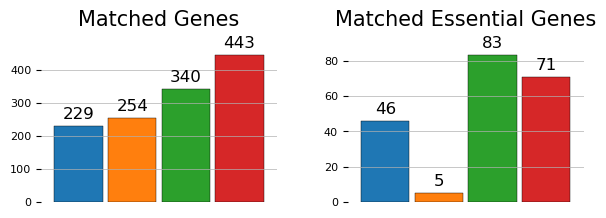

In [37]:
# Improved aesthetics for a research publication plot
def create_research_plot(counts_df):
    # Set a professional color palette
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    model_names = ['iCHO1766', 'iCHO2101', 'iCHO2291', 'iCHO3K']

    # Create subplots with 1 row and 2 columns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,2))  
    
    # Define the axes mapping for two categories
    axes_mapping = {0: axes[0], 1: axes[1]}  # Mapping two axes
    categories = ['Matched Genes', 'Matched Essential Genes']

    # A function to annotate the bars with their values
    def annotate_bars(ax):
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', xytext=(0, 3), textcoords='offset points', fontweight='light', fontsize=12)

    # Plotting and annotating each category
    for index, category in enumerate(categories):
        ax = axes_mapping[index]
        counts_df.loc[category].plot(kind='bar', ax=ax, title=category, color=colors, edgecolor='black', linewidth=.3, width=0.9, legend=False)
        annotate_bars(ax)
        ax.set_title(category, fontsize=15, fontweight='light', pad=16)
        ax.grid(True, linestyle='-', linewidth=0.5, axis='y')
        ax.set_xticks([])  # Remove x-axis ticks
        ax.set_xticklabels([])  # Remove x-axis labels
        ax.tick_params(axis='y', labelsize=8)

    # Remove border of the plots
    for ax in axes:  # Applies to both axes
        for spine in ax.spines.values():
            spine.set_visible(False)

#     # Create custom handles for the legend
#     custom_handles = [mpatches.Patch(color=color, label=model_name) for color, model_name in zip(colors, model_names)]
#     fig.legend(handles=custom_handles, loc='upper left', bbox_to_anchor=(0.15, 0.9), fontsize=10, frameon=False, fancybox=False, shadow=False)
    
    # Adjust spacing between the subplots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    # Save the figure
    plt.savefig('../Analyses/recons_comparisons/Essential_genes_coverage_comparison.svg', format='svg', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function
create_research_plot(counts_df)

#### Comparisions of Essential genes 

In [ ]:
def find_unique_genes(df1, df2, df3):
    """
    Find unique genes in each DataFrame compared to others.
    """
    # Convert gene columns to sets for comparison
    genes_1 = set(df1['gene_exp_ess.id'])
    genes_2 = set(df2['gene_exp_ess.id'])
    genes_3 = set(df3['gene_exp_ess.id'])

    # Find differences
    unique_1 = genes_1 - genes_2 - genes_3
    unique_2 = genes_2 - genes_1 - genes_3
    unique_3 = genes_3 - genes_2 - genes_1

    return unique_1, unique_2, unique_3

def find_gene_reactions(model, unique_genes):
    """
    For each gene, find associated reactions in the given model.
    """
    for gene_id in unique_genes:
        try:
            # Get the gene object from the model
            gene = model.genes.get_by_id(gene_id)
            print(f"Gene ID: {gene.id}, Name: {gene.name}")
            print("Associated Reactions:")
            
            # Print associated reactions
            for reaction in gene.reactions:
                print(f" - {reaction.id}: {reaction.reaction}")
        except KeyError:
            print(f"Gene {gene_id} not found in the model.")
            
def find_gene_reactions_to_excel(model, unique_genes, model_name):
    """
    For each gene, find associated reactions in the given model and store results in a DataFrame.
    """
    results = []

    for gene_id in unique_genes:
        try:
            # Get the gene object from the model
            gene = model.genes.get_by_id(gene_id)
            
            # Find associated reactions and append results
            for reaction in gene.reactions:
                results.append({
                    'Gene ID': gene.id,
                    'Gene Name': gene.name,
                    'Reaction ID': reaction.id,
                    'Reaction': reaction.reaction,
                    'Model': model_name
                })
        except KeyError:
            results.append({
                'Gene ID': gene_id,
                'Gene Name': 'Not Found',
                'Reaction ID': 'N/A',
                'Reaction': 'N/A',
                'Model': model_name
            })

    # Convert to DataFrame
    return pd.DataFrame(results)


# Step 1: Find unique genes in each model
unique_2101, unique_2291, unique_3K = find_unique_genes(matched_df_2101, matched_df_2291, matched_df_3K)

# Step 2: Find reactions associated with the unique genes for each model
print("\nReactions for unique genes in iCHO2101:")
find_gene_reactions(iCHO2101_changed, unique_2101)

print("\nReactions for unique genes in iCHO2291:")
find_gene_reactions(iCHO2291_changed, unique_2291)

print("\nReactions for unique genes in iCHO3K:")
find_gene_reactions(iCHO3K, unique_3K)

df_2101 = find_gene_reactions_to_excel(iCHO2101_changed, unique_2101, 'iCHO2101')
df_2291 = find_gene_reactions_to_excel(iCHO2291_changed, unique_2291, 'iCHO2291')
df_3K = find_gene_reactions_to_excel(iCHO3K, unique_3K, 'iCHO3K')


combined_df = pd.concat([df_2101, df_2291, df_3K], ignore_index=True)

combined_df.to_excel('unique_genes_reactions.xlsx', index=False)

print("Results successfully saved to 'unique_genes_reactions.xlsx'.")


In [ ]:
import pandas as pd


##### ----- Generate datasets from Google Sheet ----- #####
#Credential file
KEY_FILE_PATH = 'credentials.json'
#CHO Network Reconstruction + Recon3D_v3 Google Sheet ID
SPREADSHEET_ID = '1MlBXeHIKw8k8fZyXm-sN__AHTRSunJxar_-bqvukZws'
# Initialize the GoogleSheet object
sheet = GoogleSheet(SPREADSHEET_ID, KEY_FILE_PATH)
# Read data from the Google Sheet
sheet_rxns = 'Rxns'
rxns = sheet.read_google_sheet(sheet_rxns)
rxns_relevant_columns = rxns[['Reaction', 'GPR_yeo', 'GPR_final']]

# Filter rows from rxns_relevant_columns that have Reaction IDs matching combined_df
matching_rxns = rxns_relevant_columns[rxns_relevant_columns['Reaction'].isin(combined_df['Reaction ID'])]

# Loop through the matching reactions and print 'GPR_yeo' and 'GPR_final' for each matching reaction
for rxns_unique in combined_df['Reaction ID']:
    # Find the row in rxns_relevant_columns that matches the rxns_unique
    gpr_info = rxns_relevant_columns[rxns_relevant_columns['Reaction'] == rxns_unique]
    
    if not gpr_info.empty:
        # Extract 'GPR_yeo' and 'GPR_final' for this reaction
        gpr_yeo = gpr_info['GPR_yeo'].values[0]
        gpr_final = gpr_info['GPR_final'].values[0]
        
        # Print or use the GPR information
        print(f"Reaction: {rxns_unique}")
        print(f"GPR_yeo: {gpr_yeo}")
        print(f"GPR_final: {gpr_final}\n")
    else:
        # If the reaction is not found, add it to the 'not_found_reactions' list
        not_found_reactions.append(rxns_unique)

# Print reactions not found in Google Sheet
if not_found_reactions:
    print("\nReactions not found in the Google Sheet:")
    for reaction in not_found_reactions:
        print(reaction)
else:
    print("\nAll reactions found.")

## MEMOTE for the different reconstructions

In [ ]:
# !pip install memote
# !pip install --upgrade typing_extensions
# !pip install --upgrade pip

In [ ]:
import sys # loading commands to control/navigate within the system architecture
# Loading pandas, a library for data manipulation
import os
import xlrd
import cobra
from cobra.io import load_json_model
# Loading numpy, a library fo manipulation of numbers
import numpy as np

# loading matplotlib, a library for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# loading Memote, quality assessment of GSMM
from memote import test_model, snapshot_report

In [ ]:
iCHO3K = load_json_model('iCHO3595.json')

In [ ]:
mem_return, mem_result = test_model(iCHO3K, results=True)
with open('iOpol_MemoteReport.html', 'w') as f:
    f.write(snapshot_report(mem_result))

## Comparison of Secretory Pathway Recons

In [ ]:
path = '../Data/Sec_Recon_shared_genes/'

with open(path+'common_jahirs_metrecon.txt', 'r') as file: common_jahirs_metrecon = [line.strip() for line in file]
with open(path+'common_secrecon_jahirs.txt', 'r') as file: common_secrecon_jahirs = [line.strip() for line in file]
with open(path+'common_secrecon_metrecon.txt', 'r') as file: common_secrecon_metrecon = [line.strip() for line in file]
with open(path+'unique_secrecon_metrecon.txt', 'r') as file: unique_secrecon_metrecon = [line.strip() for line in file]

In [ ]:
# Subsystems of genes shared between Sec Recon and Met Recon (iCHO3000) minus Jahir's

rxns_secrecon_metrecon = []
subs_secrecon_metrecon = []
for g in iCHO3000.genes:
    if str(g) in unique_secrecon_metrecon:
        for rxn in g.reactions:
            if rxn.id not in rxns_secrecon_metrecon:
                rxns_secrecon_metrecon.append(rxn.id)
                subs_secrecon_metrecon.append(rxn.subsystem)


# Subsystems of genes shared between Jahir's Recon and Met Recon (iCHO3000)

rxns_jahirs_metrecon = []
subs_jahirs_metrecon = []
for g in iCHO3000.genes:
    if str(g) in common_jahirs_metrecon:
        for rxn in g.reactions:
            if rxn.id not in rxns_jahirs_metrecon:
                rxns_jahirs_metrecon.append(rxn.id)
                subs_jahirs_metrecon.append(rxn.subsystem)

In [ ]:
# Pie Chart Subsystems of genes shared between Sec Recon and Met Recon (iCHO3000) minus Jahir's

subsystem_counts = Counter(subs_secrecon_metrecon)
labels = list(subsystem_counts.keys())
sizes = list(subsystem_counts.values())

# Plot the pie chart
plt.figure(figsize=(10, 8)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Subsystem Distribution')
plt.savefig('../Plots/pie_chart_subsystems_of_genes_shared_with_secrecon.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Pie Chart of subsystems of genes shared between Jahir's Recon and Met Recon (iCHO3000)

subsystem_counts = Counter(subs_jahirs_metrecon)
labels = list(subsystem_counts.keys())
sizes = list(subsystem_counts.values())

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Subsystem Distribution')
plt.savefig('../Plots/pie_chart_subsystems_of_genes_shared_with_jahirs.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Count how many reactions from the rxns_secrecon_metrecon come from Recon3D

c=0
for i, row in rxns.iterrows():
    if (row['iCHO1766']=='-') and (row['iCH02101']=='-') and (row['iCHO2291']=='-'): #Check if the reactions has been added from Recon3D or other databases
        r = str(row['Reaction'])
        if r in rxns_secrecon_metrecon:
            c+=1
print(len(rxns_secrecon_metrecon))
print(c)

In [ ]:
import cobra
from cobra.io import load_matlab_model

# Load the .mat file using COBRApy
model = load_matlab_model('../Data/Reconciliation/models/model_iCHO2291.mat')